Importo librerias a ultilizar


In [49]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [26]:
import pandas as pd
import numpy  as np
import matplotlib as plt
import seaborn as sbn
from datetime import datetime as dt

In [46]:
%matplotlib inline 

### ¿Existe relación entre el nivel de educación y el nivel laboral requerido en las postulaciones?

Para este análisis procedemos a cargar, inicialmente, en un dataframe los datos del nivel educativo de los postulantes.


In [3]:
educacion_postulantes = pd.read_csv('../datos_navent_fiuba/fiuba_1_postulantes_educacion.csv', low_memory=False)

Echamos un vistazo general de los datos:

In [4]:
educacion_postulantes.head()

,idpostulante,nombre,estado
0,NdJl,Posgrado,En Curso
1,8BkL,Universitario,En Curso
2,1d2B,Universitario,En Curso
3,NPBx,Universitario,En Curso
4,NPBx,Master,En Curso


In [7]:
educacion_postulantes.tail()

,idpostulante,nombre,estado
298226,GNZqARp,Terciario/Técnico,Abandonado
298227,ow2p8vk,Universitario,Abandonado
298228,6rPEvwv,Universitario,Abandonado
298229,vVja45X,Universitario,Abandonado
298230,1QPMbX3,Universitario,Abandonado


Nos preguntamos la dimension de este data frame:


In [8]:
educacion_postulantes.shape

(298231, 3)

Vemos si existe algun dato nulo

In [9]:
educacion_postulantes.isnull().any()

idpostulante    False
nombre          False
estado          False
dtype: bool

Como hemos obtuvimos False en cada columna podemos estar seguros de que tenemos la informacion completa en este data frame. Con lo cual no limpiamos nada. 

Ahora procedemos a obtener la información de las postulaciones:
    

In [5]:
postulaciones = pd.read_csv('../datos_navent_fiuba/fiuba_4_postulaciones.csv')

vemos alguno de los datos para saber la estructura de nuestro data frame

In [11]:
postulaciones.head()

,idaviso,idpostulante,fechapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34
1,1111920714,NM5M,2018-02-06 09:04:50
2,1112346945,NM5M,2018-02-22 09:04:47
3,1112345547,NM5M,2018-02-22 09:04:59
4,1112237522,5awk,2018-01-25 18:55:03


Para el análisis propuesto creemos de importancia las columnas "idaviso" y "idpostulante" con lo cual procedemos a ver si estas poseen datos nulos para poder limpiarlos y tambien nos quedamos unicamente con esas columnas.

In [ ]:
postulaciones.isnull().any()

Vemos que las columnas no tienen información nula.
Nos quedamos con las columnas de interes:

In [6]:
postulaciones = postulaciones[['idaviso','idpostulante']]

Vemos el tamaño de nuestro data frame:

In [12]:
postulaciones.shape

(3401623, 2)

Para saber el nivel laboral de las publicaciones a las cuales las personas se postulan procedemos a cargar los datos de los detalles de los avisos :

In [7]:
detalles_avisos = pd.read_csv('../datos_navent_fiuba/fiuba_6_avisos_detalle.csv')

Procedemos a dar un vistazo a este data frame:

In [14]:
detalles_avisos.head()

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR
1,17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste
2,1000150677,1,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,NaN,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL
3,1000610287,1,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A
4,1000872556,1,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL


Nos preguntamos si hay datos nulos:

In [15]:
detalles_avisos.isnull().any()

idaviso                 False
idpais                  False
titulo                  False
descripcion             False
nombre_zona             False
ciudad                   True
mapacalle                True
tipo_de_trabajo         False
nivel_laboral           False
nombre_area             False
denominacion_empresa     True
dtype: bool

Vemos que no hay nulos en el nivel laboral,nos quedamos solamente con las columnas de interes.

In [9]:
nivel_laboral = detalles_avisos[['idaviso','nivel_laboral','descripcion','nombre_area']]

In [10]:
nivel_laboral.head()

,idaviso,nivel_laboral,descripcion,nombre_area
0,8725750,Senior / Semi-Senior,<p><strong><strong>Empresa:</strong></strong> ...,Comercial
1,17903700,Senior / Semi-Senior,<p>Solicitamos para importante cadena de farma...,Salud
2,1000150677,Senior / Semi-Senior,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Transporte
3,1000610287,Senior / Semi-Senior,<p><strong>Somos una empresa multinacional que...,Transporte
4,1000872556,Senior / Semi-Senior,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Producción


In [18]:
nivel_laboral.shape

(13534, 4)

Para poder ver el nivel laboral de los avisos a los cuales las personas se postulan procedemos a unir el data frame que contiene las postulaciones con el del nivel laboral de ese aviso.

In [11]:
postulaciones_por_nivel = pd.merge(postulaciones, nivel_laboral, how='left', on= 'idaviso')

Le damos una mirada a nuestro nuevo data frame:

In [20]:
postulaciones_por_nivel.head()

,idaviso,idpostulante,nivel_laboral,descripcion,nombre_area
0,1112257047,NM5M,Otro,"<p><strong><em><span style="""">En </span></em><...",Atención al Cliente
1,1111920714,NM5M,Senior / Semi-Senior,<p>En Randstad Argentina nos encontramos en bú...,Telemarketing
2,1112346945,NM5M,Senior / Semi-Senior,"<p style="""">4 Finance, importante empresa fina...",Telemarketing
3,1112345547,NM5M,Senior / Semi-Senior,<p>En Randstad Argentina nos encontramos en bú...,Telemarketing
4,1112237522,5awk,Senior / Semi-Senior,<p>Para Empresa Pyme ubicada en zona de Barrac...,Contabilidad


Vemos si hay campos nulos luego del merge, debidos a que no contemos con la informacion del nivel requerido para las postulaciones que hayan realizado los aspitantes.

In [21]:
postulaciones_por_nivel.isnull().any()

idaviso          False
idpostulante     False
nivel_laboral     True
descripcion       True
nombre_area       True
dtype: bool

Vemos que hay postulaciones en las cuales el nivel laboral no era dato, nos preguntamos cuantas son:

In [22]:
postulaciones_por_nivel.isnull().sum()

idaviso               0
idpostulante          0
nivel_laboral    327417
descripcion      327417
nombre_area      327417
dtype: int64

Vemos que son pocas las publicaciones que no tienen información del nivel laboral requerido, en comparacion con la cantidad total de postulaciones. 

Para poder ver la relacion entre las postulaciones y la educación realizamos un merge con el data frame educacion_postulantes:

In [12]:
 postulaciones_edu_niv = pd.merge(educacion_postulantes, postulaciones_por_nivel, how='left',on='idpostulante')

Vemos los datos nulos:

In [29]:
postulaciones_edu_niv.isnull().any()

idpostulante     False
nombre           False
estado           False
idaviso          False
nivel_laboral     True
descripcion       True
nombre_area       True
dtype: bool

Cambiamos el nombre de la columna "nombre" para que sea mas significativo:

In [13]:
postulaciones_edu_niv.rename(columns={'nombre': 'nivel_educacion'}, inplace = True) 

In [14]:
postulaciones_edu_niv

,idpostulante,nivel_educacion,estado,idaviso,nivel_laboral,descripcion,nombre_area
0,NdJl,Posgrado,En Curso,1112261212,Jefe / Supervisor / Responsable,<p>Nos encontramos en la búsqueda de un<strong...,Administración
1,NdJl,Posgrado,En Curso,1112273308,Jefe / Supervisor / Responsable,"<p style=""""><span style="""">Nos encontramos en ...",Finanzas
2,NdJl,Posgrado,En Curso,1112281548,Gerencia / Alta Gerencia / Dirección,<p>Importante empresa de Diagnóstico por Imáge...,Planeamiento económico-financiero
3,NdJl,Posgrado,En Curso,1112260409,Senior / Semi-Senior,<p>En <strong>New Talent</strong> buscamos par...,Control de Gestión
4,NdJl,Posgrado,En Curso,1112293547,NaN,NaN,NaN
5,NdJl,Posgrado,En Curso,1112287915,NaN,NaN,NaN
6,NdJl,Posgrado,En Curso,1112303880,Jefe / Supervisor / Responsable,<p>La busqueda esta orientada a personal con a...,Tesorería
7,NdJl,Posgrado,En Curso,1112304011,Senior / Semi-Senior,<p>Empresa de Gerenciamiento de Proyectos de C...,Administración
8,NdJl,Posgrado,En Curso,1112302347,Jefe / Supervisor / Responsable,<p>Empresa de telecomunicaciones incorporará a...,Impuestos
9,NdJl,Posgrado,En Curso,1112308241,Jefe / Supervisor / Responsable,"<div style=""""><p align=""center"" style=""""><stro...",Administración


Vemos cuales son los diferentes niveles de educación que tienen los postulantes:

In [18]:
postulaciones_edu_niv['nivel_educacion'].value_counts()

Secundario           2060789
Universitario        1916208
Terciario/Técnico     864464
Otro                  508217
Posgrado              116924
Master                 58514
Doctorado               3552
Name: nivel_educacion, dtype: int64

Para tener una mejor apreciacion procedemos a hacer un plot de estos datos:

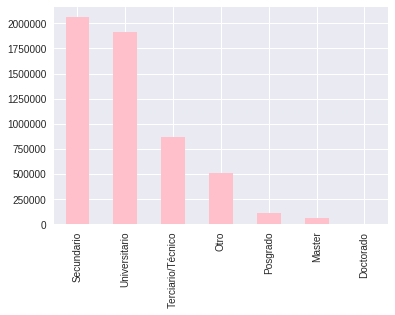

In [17]:
postulaciones_edu_niv['nivel_educacion'].value_counts().plot(kind='bar',color='pink')

En primer instancia vemos que los principales postulantes tienen un nivel de estudio no superior a la secuandaria, o quienes tienen o tuvieron  un nivel universitario. 

Nos preguntamos que niveles laborales se ofrecen:

In [20]:
postulaciones_edu_niv['nivel_laboral'].value_counts()

Senior / Semi-Senior                    3281285
Junior                                  1147393
Otro                                     395753
Jefe / Supervisor / Responsable          144716
Gerencia / Alta Gerencia / Dirección      43025
Name: nivel_laboral, dtype: int64

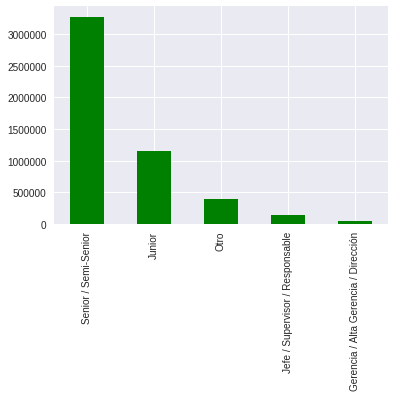

In [21]:
postulaciones_edu_niv['nivel_laboral'].value_counts().plot(kind='bar',color='green')

Vemos que hay mayor postulaciones a puestps de Senior o Semi-Senior

Nos preguntamos si las postulaciones a los cargos de mayor jerarquia se dan para personas con mayor nivel educativo, para ello procedemos a agrupar por nivel_laboral:

In [36]:
postulaciones_por_nivel_laboral = postulaciones_edu_niv.groupby('nivel_laboral')

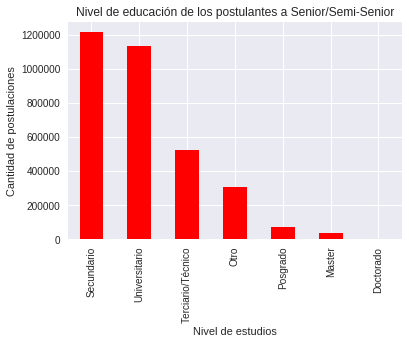

In [51]:
postulaciones_para_senior = postulaciones_por_nivel_laboral.get_group('Senior / Semi-Senior')['nivel_educacion'].value_counts().plot(kind='bar', title = "Nivel de educación de los postulantes a Senior/Semi-Senior", color = 'red')
postulaciones_para_senior.set_xlabel('Nivel de estudios')
postulaciones_para_senior.set_ylabel('Cantidad de postulaciones')



Vemos que los mas propensos a postularse a cargos de Senior o Semi-Senior son aquellos que tienen un nivel secundario y universitario.

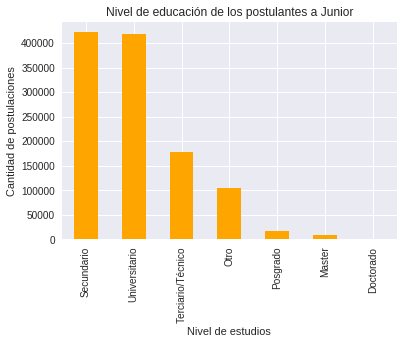

In [53]:
postulaciones_para_Junior = postulaciones_por_nivel_laboral.get_group('Junior')['nivel_educacion'].value_counts().plot(kind='bar', title = "Nivel de educación de los postulantes a Junior", color = 'orange')
postulaciones_para_Junior.set_xlabel('Nivel de estudios')
postulaciones_para_Junior.set_ylabel('Cantidad de postulaciones')



Se repite el mismo caso para Junior.

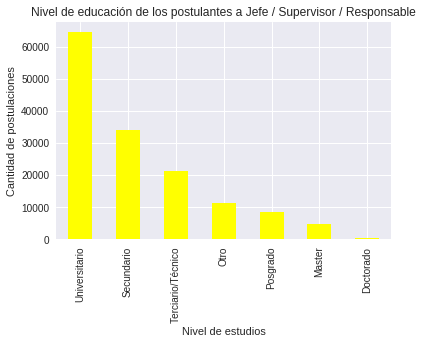

In [58]:
postulaciones_para_Jefe = postulaciones_por_nivel_laboral.get_group('Jefe / Supervisor / Responsable')['nivel_educacion'].value_counts().plot(kind='bar', title = "Nivel de educación de los postulantes a Jefe / Supervisor / Responsable", color = 'yellow')
postulaciones_para_Jefe.set_xlabel('Nivel de estudios')
postulaciones_para_Jefe.set_ylabel('Cantidad de postulaciones')



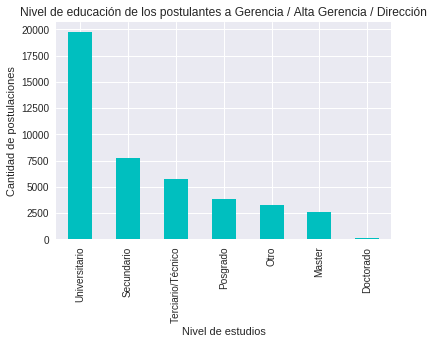

In [61]:
postulaciones_para_gerencia = postulaciones_por_nivel_laboral.get_group('Gerencia / Alta Gerencia / Dirección')['nivel_educacion'].value_counts().plot(kind='bar', title = "Nivel de educación de los postulantes a Gerencia / Alta Gerencia / Dirección", color = 'c')
postulaciones_para_gerencia.set_xlabel('Nivel de estudios')
postulaciones_para_gerencia.set_ylabel('Cantidad de postulaciones')


Para puestos Gerenciales observamos que con mayor frecuencia son los universitarios quienes se postulan.

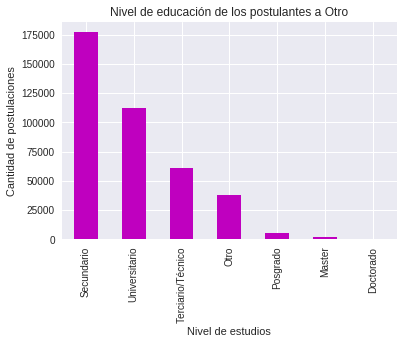

In [62]:
postulaciones_para_otro = postulaciones_por_nivel_laboral.get_group('Otro')['nivel_educacion'].value_counts().plot(kind='bar', title = "Nivel de educación de los postulantes a Otro", color = 'm')
postulaciones_para_otro.set_xlabel('Nivel de estudios')
postulaciones_para_otro.set_ylabel('Cantidad de postulaciones')


Para ofertas cuyos niveles laborales no se especifican se puede ver que los de estudios secundarios son los mas propensos a postularse.